In [2]:
!pip install pandas_profiling

  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27085 sha256=9be1b6b87938d60400b6be52e78e6ad0e4e4a423bf05444b7a03b776f155e71a
  Stored in directory: c:\users\saach\appdata\local\pip\cache\wheels\23\14\6e\4be5bfeeb027f4939a01764b48edd5996acf574b0913fe5243
  Created wheel for imagehash: filename=ImageHash-4.2.1-py2.py3-none-any.whl size=295198 sha256=ef6fa899f01789f3a918119f8e9e37d8d37f76a3cafe96d988c74c32513e0e1e
  Stored in directory: c:\users\saach\appdata\local\pip\cache\wheels\48\a1\7f\096c1269d6bf78d4768180602579b35a1e8cb1250bb4b40c74
Successfully built htmlmin imagehash


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.formula.api as smf
import scipy.stats as stats
import pandas_profiling as pf

%matplotlib inline
plt.rcParams["figure.figsize"] = 10, 7.5
plt.rcParams["axes.grid"] = True
plt.gray()

from matplotlib.backends.backend_pdf import PdfPages
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor

<Figure size 720x540 with 0 Axes>

In [3]:
CreditConsumptionData = pd.read_excel("CreditConsumptionData.xlsx")
CustomerBehaviorData = pd.read_excel("CustomerBehaviorData.xlsx")
CustomerDemographics = pd.read_excel("CustomerDemographics.xlsx")


In [4]:
CreditConsumptionData.head(5)

,ID,cc_cons
0,12554,20014.0
1,17645,10173.0
2,7604,16095.0
3,1590,7707.0
4,16556,96408.0


In [5]:
CustomerBehaviorData.head(5)

,ID,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active
0,17051,3412.60,2909.34,1077.36,3084.50,4615.97,6693.0,19.0,10,2,...,1,108,97916.0,45253.64,47635.00,2,18,19947.0,Y,3448.84
1,11491,18133.76,3877.00,6123.78,5597.43,64620.00,6117.0,4.0,60,1,...,1,4,25125.0,12912.33,18369.00,3,49,20585.0,Y,3812.69
2,7433,6363.65,735.49,8799.00,13768.00,38266.00,2638.0,2.0,83,47,...,70,11,38546.0,93567.51,26713.00,47,49,13950.0,Y,9432.90
3,14606,12765.66,4429.16,16745.86,6360.00,29063.97,3711.0,12.0,2,16,...,43,1,180315.0,176394.48,35062.74,3,37,37018.0,Y,144.61
4,8381,27819.70,1944.00,7006.50,2228.50,1096.25,1065.0,15.0,13,61,...,2,14,13480.0,3167.00,19056.00,2,15,24274.0,Y,1887.89


In [6]:
CustomerDemographics.head(5)

,ID,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction
0,19427,current,M,63,MEDIUM,30.1,10,628.0,1,5.0
1,16150,current,M,36,MEDIUM,14.4,10,656.0,0,12.0
2,11749,current,F,28,MEDIUM,4.8,10,314.0,1,13.0
3,11635,current,M,32,MEDIUM,9.6,2,614.0,1,19.0
4,8908,current,M,32,HIGH,12.0,7,750.0,1,18.0


In [7]:
Customer = pd.merge(left = CreditConsumptionData, right = CustomerBehaviorData, on = "ID").merge(CustomerDemographics, on = "ID")

Customer.head(5)

,ID,cc_cons,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,...,emi_active,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction
0,12554,20014.0,24893.00,378.00,10288.00,29664.00,16291.40,11432.00,2.0,26,...,1674.09,current,M,35,MEDIUM,15.0,1,708.0,0,17.0
1,17645,10173.0,18941.62,966.00,20672.00,287.00,4217.00,885.00,1.0,7,...,13043.34,current,M,35,HIGH,15.0,6,123.0,0,14.0
2,7604,16095.0,5678.87,2724.00,1964.50,3933.11,23956.25,5168.00,43.0,32,...,25375.27,current,M,55,MEDIUM,24.5,1,802.0,1,3.0
3,1590,7707.0,30489.50,1236.00,12609.88,9138.14,17521.00,13650.30,53.0,1,...,3544.33,current,F,29,MEDIUM,4.5,6,867.0,1,4.0
4,16556,96408.0,7441.40,6906.04,4364.00,1939.00,2121.00,6829.18,67.0,47,...,12780.44,current,M,34,MEDIUM,12.6,4,802.0,1,7.0


### DATA PREPERATION(STEP-1)

In [8]:
Customer.columns

Index(['ID', 'cc_cons', 'cc_cons_apr', 'dc_cons_apr', 'cc_cons_may',
       'dc_cons_may', 'cc_cons_jun', 'dc_cons_jun', 'cc_count_apr',
       'cc_count_may', 'cc_count_jun', 'dc_count_apr', 'dc_count_may',
       'dc_count_jun', 'card_lim', 'personal_loan_active',
       'vehicle_loan_active', 'personal_loan_closed', 'vehicle_loan_closed',
       'investment_1', 'investment_2', 'investment_3', 'investment_4',
       'debit_amount_apr', 'credit_amount_apr', 'debit_count_apr',
       'credit_count_apr', 'max_credit_amount_apr', 'debit_amount_may',
       'credit_amount_may', 'credit_count_may', 'debit_count_may',
       'max_credit_amount_may', 'debit_amount_jun', 'credit_amount_jun',
       'credit_count_jun', 'debit_count_jun', 'max_credit_amount_jun',
       'loan_enq', 'emi_active', 'account_type', 'gender', 'age', 'Income',
       'Emp_Tenure_Years', 'Tenure_with_Bank', 'region_code',
       'NetBanking_Flag', 'Avg_days_between_transaction'],
      dtype='object')

In [9]:
# There are no duplicate values

Customer.duplicated().sum()

0

In [10]:
Customer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 0 to 19999
Data columns (total 49 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            20000 non-null  int64  
 1   cc_cons                       15000 non-null  float64
 2   cc_cons_apr                   20000 non-null  float64
 3   dc_cons_apr                   20000 non-null  float64
 4   cc_cons_may                   19999 non-null  float64
 5   dc_cons_may                   20000 non-null  float64
 6   cc_cons_jun                   20000 non-null  float64
 7   dc_cons_jun                   19999 non-null  float64
 8   cc_count_apr                  19999 non-null  float64
 9   cc_count_may                  20000 non-null  int64  
 10  cc_count_jun                  20000 non-null  int64  
 11  dc_count_apr                  20000 non-null  int64  
 12  dc_count_may                  20000 non-null  int64  
 13  d

In [11]:
# This is nominal categoricaL variable

Customer.loan_enq.value_counts()

Y    19998
Name: loan_enq, dtype: int64

In [12]:
# Converting categorical to numerical value

Customer.loan_enq = np.where(Customer.loan_enq == "Y", 1, Customer.loan_enq)

In [13]:
#  Loan_enquiry is converted to numerical value

Customer.loan_enq.value_counts()

1    19998
Name: loan_enq, dtype: int64

In [14]:
# This is nominal categorical variable

Customer.account_type.value_counts()

current    16925
saving      3074
Name: account_type, dtype: int64

In [15]:
# Using one hot encoding convert nominal categorical to numerical variable

Customer = pd.get_dummies(data = Customer, columns = ["account_type"], drop_first = True)

In [16]:
# This is nominal categorical variable

Customer.gender.value_counts()

M    17287
F     2712
Name: gender, dtype: int64

In [17]:
# Using one hot encoding convert categorical to numerical variable

Customer = pd.get_dummies(data = Customer, columns = ["gender"], drop_first = True)

In [18]:
Customer.Income.value_counts()

MEDIUM    12774
LOW        5612
HIGH       1613
Name: Income, dtype: int64

In [19]:
Customer.Income = np.where(Customer.Income == "HIGH", 3 , np.where(Customer.Income == "MEDIUM", 2, 1))

In [20]:
Customer.Income.value_counts()

2    12774
1     5613
3     1613
Name: Income, dtype: int64

In [21]:
test_df = Customer[Customer.cc_cons.isnull() == True]

test_df.head(5)

,ID,cc_cons,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,...,emi_active,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,account_type_saving,gender_M
15000,17591,NaN,2795.45,1290.0,6141.05,676.50,9146.10,15479.00,4.0,10,...,1170.49,37,2,11.9,4,575.0,1,16.0,0,1
15001,13541,NaN,29405.13,1640.0,1670.00,2463.92,10947.50,956.00,3.0,10,...,16447.45,33,2,7.8,6,394.0,0,19.0,0,1
15002,13431,NaN,5985.20,6189.0,2696.09,766.00,716.00,4133.22,7.0,30,...,2622.28,53,1,33.0,10,324.0,1,15.0,0,1
15003,8687,NaN,2105.93,18225.0,34763.56,167.00,4260.27,20185.00,1.0,99,...,340.79,33,2,7.8,5,370.0,1,7.0,0,1
15004,14727,NaN,3269.00,3532.0,3158.40,2699.77,3373.48,5120.00,2.0,10,...,2812.20,62,1,12.6,9,505.0,1,3.0,0,1


In [22]:
# Only considering non - missing values for building the model

train_df = Customer[Customer.cc_cons.isnull() == False]
train_df.head(5)

,ID,cc_cons,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,...,emi_active,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,account_type_saving,gender_M
0,12554,20014.0,24893.00,378.00,10288.00,29664.00,16291.40,11432.00,2.0,26,...,1674.09,35,2,15.0,1,708.0,0,17.0,0,1
1,17645,10173.0,18941.62,966.00,20672.00,287.00,4217.00,885.00,1.0,7,...,13043.34,35,3,15.0,6,123.0,0,14.0,0,1
2,7604,16095.0,5678.87,2724.00,1964.50,3933.11,23956.25,5168.00,43.0,32,...,25375.27,55,2,24.5,1,802.0,1,3.0,0,1
3,1590,7707.0,30489.50,1236.00,12609.88,9138.14,17521.00,13650.30,53.0,1,...,3544.33,29,2,4.5,6,867.0,1,4.0,0,0
4,16556,96408.0,7441.40,6906.04,4364.00,1939.00,2121.00,6829.18,67.0,47,...,12780.44,34,2,12.6,4,802.0,1,7.0,0,1


In [23]:
# missing value treatment

def missing_val(x):
    if ((x.dtype == "float") or (x.dtype == "int")):
        x = x.fillna(x.median())
    else:
        x
    
    return x

In [24]:
train_df = train_df.apply(missing_val)

In [25]:
# outlier treatment

def outlier_val(x):
    if ((x.dtype == "float") or (x.dtype == "int")):
        x = x.clip(lower = x.quantile(0.01), upper = x.quantile(0.99))
        
    elif ((x.dtype == "object") or (x.dtype == "O")):
        x = x.mode()[0]
    else:
        x
    
    return x

In [26]:
train_df = train_df.apply(outlier_val)

In [63]:
# Perform pandas profiling

cc_report = pf.ProfileReport(train_df)

cc_report.to_file('cc_report.html')

Summarize dataset:   0%|          | 0/62 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### DATA PREPERATION (STEP-2)

C:\Users\saach\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cc_cons', ylabel='Density'>

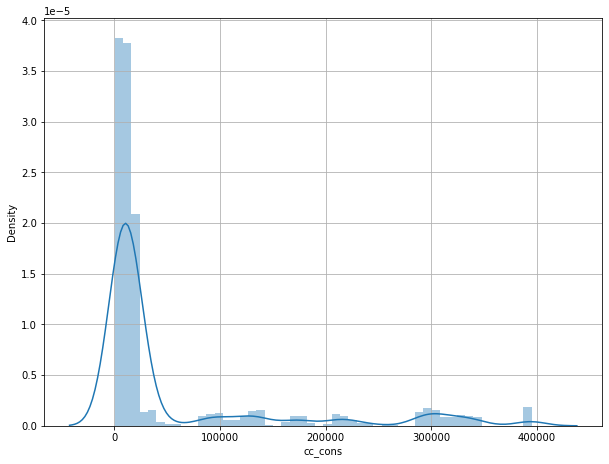

In [27]:
sns.distplot(train_df.cc_cons)

C:\Users\saach\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cc_cons', ylabel='Density'>

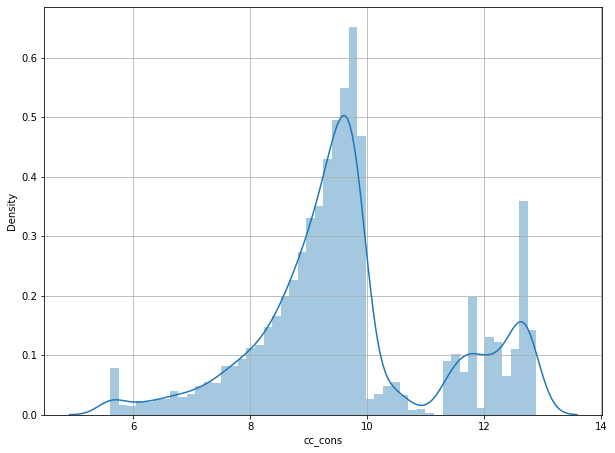

In [28]:
sns.distplot(np.log(train_df.cc_cons))

C:\Users\saach\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cc_cons', ylabel='Density'>

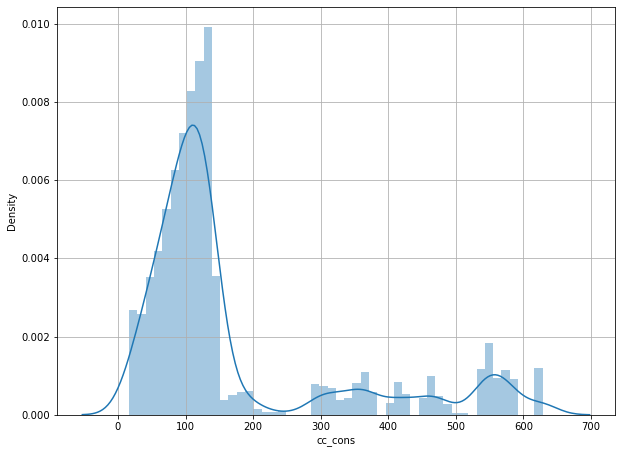

In [29]:
sns.distplot(np.sqrt(train_df.cc_cons))

#### The variable doe NOT follow normal distribution. So we CANNOT apply linear regression. We can plan to apply K Nearest Neighbors technique

In [30]:
train_df

,ID,cc_cons,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,...,emi_active,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,account_type_saving,gender_M
0,12554,20014.00,24893.00,378.00,10288.00,29664.00,16291.40,11432.00,2.0,26,...,1674.09,35,2,15.0,1,708.0,0,17.0,0,1
1,17645,10173.00,18941.62,966.00,20672.00,287.00,4217.00,885.00,1.0,7,...,13043.34,35,3,15.0,6,233.0,0,14.0,0,1
2,7604,16095.00,5678.87,2724.00,1964.50,3933.11,23956.25,5168.00,43.0,32,...,25375.27,55,2,24.5,1,802.0,1,3.0,0,1
3,1590,7707.00,30489.50,1236.00,12609.88,9138.14,17521.00,13650.30,53.0,1,...,3544.33,29,2,4.5,6,867.0,1,4.0,0,0
4,16556,96408.00,7441.40,6906.04,4364.00,1939.00,2121.00,6829.18,67.0,47,...,12780.44,34,2,12.6,4,802.0,1,7.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,6995,4263.00,10443.76,1218.85,7252.24,3873.00,6633.00,10107.00,3.0,36,...,78966.76,53,1,13.2,9,653.0,1,20.0,0,0
14996,10376,11019.00,29890.33,6308.00,16025.50,7610.00,2213.08,841.60,1.0,34,...,4762.10,44,2,2.4,9,535.0,1,2.0,0,1
14997,2181,395290.55,4148.98,948.74,19360.26,494.00,44363.91,1801.77,57.0,23,...,2877.33,37,2,3.4,9,464.0,1,8.0,0,1
14998,18417,28813.00,115574.00,7191.05,44341.13,34817.20,20679.00,1010.00,7.0,128,...,13006.84,220,2,40.0,10,536.0,1,3.0,0,1


### DATA PREPERATION (STEP-3)

#### FEATURE ENGINEERING

In [31]:
train_df.describe(include = "all")

,ID,cc_cons,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,...,emi_active,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,account_type_saving,gender_M
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,...,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,10032.077067,55091.027333,17400.638053,7666.626111,15707.246484,7140.883809,11630.523379,6765.903731,41.487400,33.490200,...,10237.828227,47.790600,1.800800,14.733960,5.510000,599.090467,0.719533,11.049600,0.151533,0.863000
std,5760.372343,97429.489575,21123.224620,10504.034191,20505.046326,10142.227951,14493.843750,10448.125288,97.432486,49.540999,...,21873.322708,30.632766,0.565279,17.031901,2.865783,218.662770,0.449242,5.492196,0.358580,0.343859
min,1.000000,271.990000,658.766900,153.140000,508.980000,156.951000,334.000000,188.500000,1.000000,1.000000,...,26.686600,25.000000,1.000000,0.900000,1.000000,233.000000,0.000000,2.000000,0.000000,0.000000
25%,5060.500000,6768.000000,4411.027500,1634.000000,3638.000000,1643.500000,3004.500000,1358.750000,5.000000,8.000000,...,1549.770000,33.000000,1.000000,5.100000,3.000000,424.000000,0.000000,6.000000,0.000000,1.000000
50%,10054.000000,13364.000000,10288.100000,3996.900000,8695.030000,3820.500000,6655.250000,3327.000000,10.000000,23.000000,...,3955.280000,40.000000,2.000000,9.900000,6.000000,623.000000,1.000000,11.000000,0.000000,1.000000
75%,15015.250000,20105.750000,21405.000000,9339.020000,18951.300000,8212.000000,14247.000000,7597.000000,44.000000,43.000000,...,9376.390000,53.000000,2.000000,18.000000,8.000000,799.000000,1.000000,16.000000,0.000000,1.000000
max,19998.000000,395290.550000,123825.340000,64804.000000,126467.994000,64786.540000,86965.225000,71638.000000,531.000000,601.000000,...,157951.880000,223.000000,3.000000,121.200000,10.000000,968.000000,1.000000,20.000000,1.000000,1.000000


#### 1. check the Linearity within the variables

In [32]:
train_df

,ID,cc_cons,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,...,emi_active,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,account_type_saving,gender_M
0,12554,20014.00,24893.00,378.00,10288.00,29664.00,16291.40,11432.00,2.0,26,...,1674.09,35,2,15.0,1,708.0,0,17.0,0,1
1,17645,10173.00,18941.62,966.00,20672.00,287.00,4217.00,885.00,1.0,7,...,13043.34,35,3,15.0,6,233.0,0,14.0,0,1
2,7604,16095.00,5678.87,2724.00,1964.50,3933.11,23956.25,5168.00,43.0,32,...,25375.27,55,2,24.5,1,802.0,1,3.0,0,1
3,1590,7707.00,30489.50,1236.00,12609.88,9138.14,17521.00,13650.30,53.0,1,...,3544.33,29,2,4.5,6,867.0,1,4.0,0,0
4,16556,96408.00,7441.40,6906.04,4364.00,1939.00,2121.00,6829.18,67.0,47,...,12780.44,34,2,12.6,4,802.0,1,7.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,6995,4263.00,10443.76,1218.85,7252.24,3873.00,6633.00,10107.00,3.0,36,...,78966.76,53,1,13.2,9,653.0,1,20.0,0,0
14996,10376,11019.00,29890.33,6308.00,16025.50,7610.00,2213.08,841.60,1.0,34,...,4762.10,44,2,2.4,9,535.0,1,2.0,0,1
14997,2181,395290.55,4148.98,948.74,19360.26,494.00,44363.91,1801.77,57.0,23,...,2877.33,37,2,3.4,9,464.0,1,8.0,0,1
14998,18417,28813.00,115574.00,7191.05,44341.13,34817.20,20679.00,1010.00,7.0,128,...,13006.84,220,2,40.0,10,536.0,1,3.0,0,1


In [34]:
corry_y = train_df.corrwith(train_df.cc_cons)

In [35]:
corry_y

ID                              0.004620
cc_cons                         1.000000
cc_cons_apr                     0.006077
dc_cons_apr                     0.001473
cc_cons_may                     0.020469
dc_cons_may                    -0.009181
cc_cons_jun                    -0.000248
dc_cons_jun                     0.000240
cc_count_apr                   -0.009690
cc_count_may                    0.016535
cc_count_jun                   -0.002022
dc_count_apr                   -0.000818
dc_count_may                    0.007693
dc_count_jun                   -0.006128
card_lim                       -0.003106
personal_loan_active                 NaN
vehicle_loan_active                  NaN
personal_loan_closed                 NaN
vehicle_loan_closed                  NaN
investment_1                    0.004854
investment_2                    0.002768
investment_3                   -0.011506
investment_4                    0.001162
debit_amount_apr               -0.001180
credit_amount_ap

In [36]:
corry_y.to_csv("corry_y.csv")

#### 2. Calculating the coefficient of variance (CV = std. deviation/mean)

In [64]:
train_df.apply(lambda x: (x.std()/x.mean()))

ID                              0.574195
cc_cons                         1.768518
cc_cons_apr                     1.213934
dc_cons_apr                     1.370099
cc_cons_may                     1.305451
dc_cons_may                     1.420304
cc_cons_jun                     1.246190
dc_cons_jun                     1.544232
cc_count_apr                    2.348484
cc_count_may                    1.479269
cc_count_jun                    1.140601
dc_count_apr                    1.127464
dc_count_may                    1.222284
dc_count_jun                    0.965835
card_lim                        0.647748
personal_loan_active            0.000000
vehicle_loan_active             0.000000
personal_loan_closed            0.000000
vehicle_loan_closed             0.000000
investment_1                    3.519763
investment_2                    1.425184
investment_3                    1.982864
investment_4                    2.013605
debit_amount_apr                1.160878
credit_amount_ap

#### 3.feature selection based on importance

In [66]:
from sklearn.feature_selection import f_regression, RFE, SelectKBest

In [35]:
target = train_df.cc_cons

features = train_df[train_df.columns.difference(["cc_cons"])]

In [68]:
F_value, P_value = f_regression(features, target)

C:\Users\saach\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:301: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
C:\Users\saach\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:306: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom


In [69]:
f_reg_results = pd.concat( [ pd.Series(features.columns), pd.Series(F_value),pd.Series(P_value)], axis = 1)
f_reg_results.columns = ["Features", "F_value", "P_value"]

In [41]:
f_reg_results

,Features,F_value,P_value
0,Avg_days_between_transaction,0.425059,0.514433
1,Emp_Tenure_Years,1.409554,0.235149
2,ID,0.320157,0.571522
3,Income,0.640222,0.423643
4,NetBanking_Flag,0.039949,0.841583
5,Tenure_with_Bank,1.958730,0.161670
6,account_type_saving,0.121426,0.727498
7,age,0.725442,0.394378
8,card_lim,0.144665,0.703692
9,cc_cons_apr,0.553930,0.456728


#### 4.RFE - Recursive Feature Elimination

In [42]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

In [37]:
Y = train_df.cc_cons
X = train_df[train_df.columns.difference(["cc_cons"])]

In [44]:
RFE_model = RFE(estimator = RandomForestRegressor(), n_features_to_select = 10, verbose = True).fit(X, Y)

Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 fe

In [38]:
X.columns

Index(['Avg_days_between_transaction', 'Emp_Tenure_Years', 'ID', 'Income',
       'NetBanking_Flag', 'Tenure_with_Bank', 'account_type_saving', 'age',
       'card_lim', 'cc_cons_apr', 'cc_cons_jun', 'cc_cons_may', 'cc_count_apr',
       'cc_count_jun', 'cc_count_may', 'credit_amount_apr',
       'credit_amount_jun', 'credit_amount_may', 'credit_count_apr',
       'credit_count_jun', 'credit_count_may', 'dc_cons_apr', 'dc_cons_jun',
       'dc_cons_may', 'dc_count_apr', 'dc_count_jun', 'dc_count_may',
       'debit_amount_apr', 'debit_amount_jun', 'debit_amount_may',
       'debit_count_apr', 'debit_count_jun', 'debit_count_may', 'emi_active',
       'gender_M', 'investment_1', 'investment_2', 'investment_3',
       'investment_4', 'loan_enq', 'max_credit_amount_apr',
       'max_credit_amount_jun', 'max_credit_amount_may',
       'personal_loan_active', 'personal_loan_closed', 'region_code',
       'vehicle_loan_active', 'vehicle_loan_closed'],
      dtype='object')

In [85]:
X_new = X[X.columns[RFE_model.get_support()]]
X_new

,ID,cc_cons_apr,cc_cons_jun,cc_cons_may,credit_amount_jun,credit_amount_may,dc_cons_jun,debit_amount_may,emi_active,max_credit_amount_apr
0,12554,24893.00,16291.40,10288.00,12761.00,191777.13,11432.00,11527.50,1674.09,25296.0
1,17645,18941.62,4217.00,20672.00,76206.00,71162.00,885.00,92276.57,13043.34,80750.0
2,7604,5678.87,23956.25,1964.50,75283.00,70978.00,5168.00,19343.00,25375.27,38466.0
3,1590,30489.50,17521.00,12609.88,68708.00,63033.84,13650.30,43867.91,3544.33,52732.0
4,16556,7441.40,2121.00,4364.00,80140.00,30286.00,6829.18,153253.71,12780.44,19613.0
...,...,...,...,...,...,...,...,...,...,...
14995,6995,10443.76,6633.00,7252.24,42625.50,23692.00,10107.00,30501.77,78966.76,27608.0
14996,10376,29890.33,2213.08,16025.50,34987.55,50023.00,841.60,57918.69,4762.10,30512.0
14997,2181,4148.98,44363.91,19360.26,261432.00,35239.00,1801.77,25404.75,2877.33,41085.0
14998,18417,115574.00,20679.00,44341.13,33025.29,82193.00,1010.00,46086.90,13006.84,19110.0


In [73]:
# Top 10 columns identified from RFE technique
pd.Series(X_new.columns)

0                       ID
1              cc_cons_apr
2              cc_cons_jun
3              cc_cons_may
4        credit_amount_jun
5        credit_amount_may
6              dc_cons_jun
7         debit_amount_may
8               emi_active
9    max_credit_amount_apr
dtype: object

In [81]:
rfe_ranking = pd.concat([pd.Series(features.columns), pd.Series(RFE_model.ranking_)], axis =1)
rfe_ranking.columns = ["Feature", "Rank"]

In [83]:
rfe_ranking.sort_values(by = "Rank")

,Feature,Rank
17,credit_amount_may,1
33,emi_active,1
2,ID,1
29,debit_amount_may,1
22,dc_cons_jun,1
11,cc_cons_may,1
40,max_credit_amount_apr,1
10,cc_cons_jun,1
16,credit_amount_jun,1
9,cc_cons_apr,1


In [33]:
final_list = ['cc_cons_may',
        'cc_count_may',
        'credit_amount_apr',
        'credit_count_may',
        'Tenure_with_Bank',
        'emi_active',
        'max_credit_amount_may',
        'max_credit_amount_jun',
        'dc_count_may',
        'Income',
        'cc_cons_apr',
        'credit_count_jun',
        'max_credit_amount_apr',
        'investment_1',
        'ID',
        'credit_amount_may',
        'Avg_days_between_transaction',
        'debit_count_jun',
        'dc_count_jun',
        'age',
        'dc_cons_may',
        'cc_count_apr',
        'Emp_Tenure_Years',
        'investment_3',
        'region_code',
        'cc_cons_jun',
        'credit_amount_jun',
        'dc_cons_jun',
        'debit_amount_may']

In [36]:
features[final_list]

,cc_cons_may,cc_count_may,credit_amount_apr,credit_count_may,Tenure_with_Bank,emi_active,max_credit_amount_may,max_credit_amount_jun,dc_count_may,Income,...,age,dc_cons_may,cc_count_apr,Emp_Tenure_Years,investment_3,region_code,cc_cons_jun,credit_amount_jun,dc_cons_jun,debit_amount_may
0,10288.00,26,25192.0000,2,1,1674.09,24563.0,50836.00,14,2,...,35,29664.00,2.0,15.0,787.0,708.0,16291.40,12761.00,11432.00,11527.50
1,20672.00,7,88693.3700,2,6,13043.34,23948.0,23226.00,21,3,...,35,287.00,1.0,15.0,90525.0,233.0,4217.00,76206.00,885.00,92276.57
2,1964.50,32,84880.0000,2,1,25375.27,10752.0,27036.00,1,2,...,55,3933.11,43.0,24.5,25524.0,802.0,23956.25,75283.00,5168.00,19343.00
3,12609.88,1,236326.0000,23,6,3544.33,12607.0,43037.00,1,2,...,29,9138.14,53.0,4.5,48500.0,867.0,17521.00,68708.00,13650.30,43867.91
4,4364.00,47,58897.0300,24,4,12780.44,25213.0,32044.00,16,2,...,34,1939.00,67.0,12.6,183999.0,802.0,2121.00,80140.00,6829.18,153253.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,7252.24,36,31135.0000,1,9,78966.76,6936.0,82851.00,55,1,...,53,3873.00,3.0,13.2,16215.0,653.0,6633.00,42625.50,10107.00,30501.77
14996,16025.50,34,23797.0000,4,9,4762.10,202639.0,118110.47,1,2,...,44,7610.00,1.0,2.4,12337.0,535.0,2213.08,34987.55,841.60,57918.69
14997,19360.26,23,95477.2700,43,9,2877.33,44421.0,49545.00,3,2,...,37,494.00,57.0,3.4,25000.0,464.0,44363.91,261432.00,1801.77,25404.75
14998,44341.13,128,59644.0000,3,10,13006.84,22409.0,16130.00,9,2,...,220,34817.20,7.0,40.0,3975.0,536.0,20679.00,33025.29,1010.00,46086.90


In [94]:
#Multicollinearity check using VIF approach

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [97]:
VIF = pd.Series([variance_inflation_factor(features[list].values, i) for i in range(len(final_list))])

In [99]:
VIF_value = pd.concat([pd.Series(final_list),VIF], axis =1)
VIF_value.columns = ["feature,", "vif"]

In [100]:
VIF_value.sort_values(by = "vif")

,"feature,",vif
16,Avg_days_between_transaction,1.001660
8,dc_count_may,1.001847
9,Income,1.001895
22,Emp_Tenure_Years,1.001956
14,ID,1.002058
15,credit_amount_may,1.002087
21,cc_count_apr,1.002133
2,credit_amount_apr,1.002176
0,cc_cons_may,1.002311
3,credit_count_may,1.002500


# Since all the VIF values are below 3. There is no multicollinearity

# DATA PREPERATION (STEP -4)

In [40]:
features[final_list]

,cc_cons_may,cc_count_may,credit_amount_apr,credit_count_may,Tenure_with_Bank,emi_active,max_credit_amount_may,max_credit_amount_jun,dc_count_may,Income,...,age,dc_cons_may,cc_count_apr,Emp_Tenure_Years,investment_3,region_code,cc_cons_jun,credit_amount_jun,dc_cons_jun,debit_amount_may
0,10288.00,26,25192.0000,2,1,1674.09,24563.0,50836.00,14,2,...,35,29664.00,2.0,15.0,787.0,708.0,16291.40,12761.00,11432.00,11527.50
1,20672.00,7,88693.3700,2,6,13043.34,23948.0,23226.00,21,3,...,35,287.00,1.0,15.0,90525.0,233.0,4217.00,76206.00,885.00,92276.57
2,1964.50,32,84880.0000,2,1,25375.27,10752.0,27036.00,1,2,...,55,3933.11,43.0,24.5,25524.0,802.0,23956.25,75283.00,5168.00,19343.00
3,12609.88,1,236326.0000,23,6,3544.33,12607.0,43037.00,1,2,...,29,9138.14,53.0,4.5,48500.0,867.0,17521.00,68708.00,13650.30,43867.91
4,4364.00,47,58897.0300,24,4,12780.44,25213.0,32044.00,16,2,...,34,1939.00,67.0,12.6,183999.0,802.0,2121.00,80140.00,6829.18,153253.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,7252.24,36,31135.0000,1,9,78966.76,6936.0,82851.00,55,1,...,53,3873.00,3.0,13.2,16215.0,653.0,6633.00,42625.50,10107.00,30501.77
14996,16025.50,34,23797.0000,4,9,4762.10,202639.0,118110.47,1,2,...,44,7610.00,1.0,2.4,12337.0,535.0,2213.08,34987.55,841.60,57918.69
14997,19360.26,23,95477.2700,43,9,2877.33,44421.0,49545.00,3,2,...,37,494.00,57.0,3.4,25000.0,464.0,44363.91,261432.00,1801.77,25404.75
14998,44341.13,128,59644.0000,3,10,13006.84,22409.0,16130.00,9,2,...,220,34817.20,7.0,40.0,3975.0,536.0,20679.00,33025.29,1010.00,46086.90


In [43]:
pd.Series(Y)

0         20014.00
1         10173.00
2         16095.00
3          7707.00
4         96408.00
           ...    
14995      4263.00
14996     11019.00
14997    395290.55
14998     28813.00
14999     16252.00
Name: cc_cons, Length: 15000, dtype: float64

In [44]:
df = pd.concat([features[final_list],pd.Series(Y)], axis = 1)

In [45]:
df

,cc_cons_may,cc_count_may,credit_amount_apr,credit_count_may,Tenure_with_Bank,emi_active,max_credit_amount_may,max_credit_amount_jun,dc_count_may,Income,...,dc_cons_may,cc_count_apr,Emp_Tenure_Years,investment_3,region_code,cc_cons_jun,credit_amount_jun,dc_cons_jun,debit_amount_may,cc_cons
0,10288.00,26,25192.0000,2,1,1674.09,24563.0,50836.00,14,2,...,29664.00,2.0,15.0,787.0,708.0,16291.40,12761.00,11432.00,11527.50,20014.00
1,20672.00,7,88693.3700,2,6,13043.34,23948.0,23226.00,21,3,...,287.00,1.0,15.0,90525.0,233.0,4217.00,76206.00,885.00,92276.57,10173.00
2,1964.50,32,84880.0000,2,1,25375.27,10752.0,27036.00,1,2,...,3933.11,43.0,24.5,25524.0,802.0,23956.25,75283.00,5168.00,19343.00,16095.00
3,12609.88,1,236326.0000,23,6,3544.33,12607.0,43037.00,1,2,...,9138.14,53.0,4.5,48500.0,867.0,17521.00,68708.00,13650.30,43867.91,7707.00
4,4364.00,47,58897.0300,24,4,12780.44,25213.0,32044.00,16,2,...,1939.00,67.0,12.6,183999.0,802.0,2121.00,80140.00,6829.18,153253.71,96408.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,7252.24,36,31135.0000,1,9,78966.76,6936.0,82851.00,55,1,...,3873.00,3.0,13.2,16215.0,653.0,6633.00,42625.50,10107.00,30501.77,4263.00
14996,16025.50,34,23797.0000,4,9,4762.10,202639.0,118110.47,1,2,...,7610.00,1.0,2.4,12337.0,535.0,2213.08,34987.55,841.60,57918.69,11019.00
14997,19360.26,23,95477.2700,43,9,2877.33,44421.0,49545.00,3,2,...,494.00,57.0,3.4,25000.0,464.0,44363.91,261432.00,1801.77,25404.75,395290.55
14998,44341.13,128,59644.0000,3,10,13006.84,22409.0,16130.00,9,2,...,34817.20,7.0,40.0,3975.0,536.0,20679.00,33025.29,1010.00,46086.90,28813.00


In [49]:
Y = df.cc_cons
X = df[df.columns.difference(["cc_cons"])]

#### Split the data into train and test

In [50]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [51]:
train_X, test_X, train_Y, test_Y=train_test_split(X, Y, test_size=0.3, random_state =123)

# MODEL BUILDING

# Applying XGBoost Technique

### When you don't know the tuning parameter

In [54]:
!pip install xgboost

In [55]:
from xgboost import XGBClassifier, XGBRegressor

In [57]:
grid = {"n_estimators": [100,200,400,600,800], "learning_rate":[10**x for x in range(-3,3)]}

In [59]:
from sklearn.model_selection import GridSearchCV

In [60]:
model = GridSearchCV(XGBRegressor(), grid, cv = 5, n_jobs = -1, verbose = True)

In [62]:
model = model.fit(train_X, train_Y)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


C:\Users\saach\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [-0.2624312  -0.21512412 -0.14448532 -0.09734135 -0.06590663 -0.04435985
 -0.01072978 -0.01275489 -0.02024281 -0.02752719 -0.04429302 -0.07330553
 -0.10118522 -0.11769624 -0.12649627 -0.80632693 -0.8200675  -0.82118104
 -0.82118186 -0.82118208         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan]
  warnings.warn(


In [63]:
model.best_params_

{'learning_rate': 0.01, 'n_estimators': 200}

In [64]:
model.best_score_

-0.010729784606957704

### When you know the tuning parameter

In [66]:
model_tuned = XGBRegressor(n_estimators = 200, learning_rate = 0.01)

In [67]:
model_tuned = model_tuned.fit(train_X, train_Y)

## Applying on the test results

In [70]:
pred_train_Y = model_tuned.predict(train_X)
pred_test_Y = model_tuned.predict(test_X)

## ACCURACY

In [76]:
# MAPE

print("Train data",100- (np.mean(np.abs((train_Y - pred_train_Y)/train_Y))))
print("Test data", 100 - (np.mean(np.abs((test_Y - pred_test_Y)/test_Y))))

Train data 91.6242245693188
Test data 90.76506123930503


In [81]:
# RMSE

print("Train data", (np.sqrt(np.mean((train_Y - pred_train_Y)**2))))
print("Test data", (np.sqrt(np.mean((test_Y - pred_test_Y)**2))))

Train data 92019.915448478
Test data 98428.74243645802


## ---------------------------------------------------------------------------------

# ADDITIONAL CODE

In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
sc = StandardScaler()

In [48]:
sc = sc.fit(train_X)

In [49]:
train_X_std = pd.DataFrame(sc.transform(train_X), columns = train_X.columns)

In [50]:
train_X_std.head()

,Avg_days_between_transaction,Emp_Tenure_Years,ID,Income,NetBanking_Flag,Tenure_with_Bank,account_type_saving,age,card_lim,cc_cons_apr,...,investment_4,loan_enq,max_credit_amount_apr,max_credit_amount_jun,max_credit_amount_may,personal_loan_active,personal_loan_closed,region_code,vehicle_loan_active,vehicle_loan_closed
0,1.442469,-0.645418,1.203852,-1.410734,0.626114,-1.226640,-0.426809,-0.489336,1.391074,-0.697929,...,0.259881,0.0,0.340892,-0.547441,-0.448281,0.0,0.0,-0.702405,0.0,0.0
1,-0.558482,1.039255,-0.406899,0.352474,0.626114,0.169952,-0.426809,0.420676,1.519798,-0.685803,...,-0.474146,0.0,1.934166,-0.108831,-0.542160,0.0,0.0,-0.505765,0.0,0.0
2,0.351041,0.319822,1.329184,-1.410734,0.626114,-1.226640,-0.426809,0.420676,-0.724474,-0.386120,...,-0.995355,0.0,-0.431217,-0.650482,-0.519284,0.0,0.0,-1.036235,0.0,0.0
3,-1.104196,-0.459564,-1.333527,0.352474,0.626114,-1.575788,-0.426809,-0.590448,0.266140,-0.608738,...,-0.497843,0.0,4.946141,-0.089838,-0.436758,0.0,0.0,-1.607863,0.0,0.0
4,1.624373,0.739491,-1.071057,0.352474,0.626114,-1.575788,-0.426809,-0.017478,-0.019291,-0.722623,...,-0.164246,0.0,-0.467613,-0.511030,-0.298950,0.0,0.0,-0.277114,0.0,0.0


In [51]:
test_X_std = pd.DataFrame(sc.transform(test_X), columns = test_X.columns)

# MODEL BUILDING

In [54]:
train_X

,Avg_days_between_transaction,Emp_Tenure_Years,ID,Income,NetBanking_Flag,Tenure_with_Bank,account_type_saving,age,card_lim,cc_cons_apr,...,investment_4,loan_enq,max_credit_amount_apr,max_credit_amount_jun,max_credit_amount_may,personal_loan_active,personal_loan_closed,region_code,vehicle_loan_active,vehicle_loan_closed
5242,19.0,3.9,16986,1,1,2,0,33,525000,2626.810,...,5340.00000,1,66443.0,16417.0,24320.00,1,1.0,445.0,1,1
12675,8.0,32.0,7707,2,1,6,0,60,548000,2885.000,...,167.00000,1,151896.0,41774.0,18894.00,1,1.0,488.0,1,1
6924,13.0,20.0,17708,1,1,2,0,60,147000,9265.980,...,-3506.17993,1,25032.0,10460.0,20216.20,1,1.0,372.0,1,1
12596,5.0,7.0,2369,2,1,1,0,30,324000,4525.900,...,0.00000,1,313439.0,42872.0,24986.00,1,1.0,247.0,1,1
12569,20.0,27.0,3881,2,1,1,0,47,273000,2101.000,...,2351.00000,1,23080.0,18522.0,32951.00,1,1.0,538.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5218,6.0,49.0,4222,1,1,3,0,118,160000,17417.010,...,0.00000,1,22930.0,59757.0,652.35,1,1.0,244.0,1,1
12252,5.0,5.6,18614,3,1,1,0,34,34000,7133.590,...,-5998.43994,1,75622.0,23990.0,64663.00,1,1.0,372.0,1,1
1346,5.0,7.2,12912,2,1,10,0,28,232000,30768.080,...,-6885.00000,1,19469.0,28437.0,22220.00,1,1.0,748.0,1,1
11646,14.0,1.4,18057,2,1,4,0,27,373000,5859.155,...,-4679.00000,1,6060.0,36397.0,179347.00,1,1.0,536.0,1,1


#### Scenario-1: When we don't know parameters of KNN. The tuning parameters/ hyper-parameters: n_neighbors, weights

In [90]:
from sklearn.neighbors import KNeighborsRegressor

In [100]:
model = GridSearchCV(estimator = KNeighborsRegressor(), cv = 10, param_grid = {"n_neighbors": [3,4,5,6,7,8,9,10], "weights":["uniform", "distance"]}, scoring = "r2",n_jobs = -1, verbose = True)

In [104]:
model = model.fit(train_X,train_Y)

Fitting 10 folds for each of 16 candidates, totalling 160 fits


In [105]:
model.best_params_

{'n_neighbors': 10, 'weights': 'uniform'}

In [106]:
model.best_score_

-0.10523469836123747

#### To get list of score metrics

In [109]:
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_we

In [108]:
model.cv_results_

{'mean_fit_time': array([0.11324315, 0.02748654, 0.02296226, 0.02689848, 0.0204344 ,
        0.02137668, 0.02251413, 0.02553749, 0.01728866, 0.01896923,
        0.017998  , 0.02375104, 0.0235455 , 0.0224045 , 0.01896968,
        0.02257447]),
 'std_fit_time': array([0.10314461, 0.01377669, 0.00862073, 0.00978045, 0.00670557,
        0.00937498, 0.00671187, 0.00591674, 0.00484257, 0.00642623,
        0.01084857, 0.01077034, 0.00938241, 0.00837968, 0.0052441 ,
        0.00852569]),
 'mean_score_time': array([1.02152848, 0.66629987, 0.6164736 , 0.62045689, 0.59424386,
        0.57887807, 0.58938496, 0.59225583, 0.57740829, 0.56279538,
        0.60895338, 0.61197407, 0.6362323 , 0.58550642, 0.5714431 ,
        0.53991179]),
 'std_score_time': array([0.2030478 , 0.05130108, 0.01982847, 0.03532924, 0.02329845,
        0.02563543, 0.02014942, 0.02024072, 0.04078614, 0.02293429,
        0.04773397, 0.03940966, 0.03160203, 0.0198033 , 0.01812382,
        0.04241533]),
 'param_n_neighbors': mask